<a href="https://colab.research.google.com/github/subbu27iitb/Anomaly-Detection/blob/main/Isolation_Forest_Contextual_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=XCF-kqCB_vA

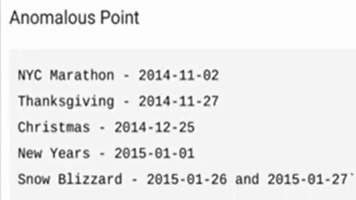

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving nyc_taxi.csv to nyc_taxi.csv


In [10]:
df = pd.read_csv("nyc_taxi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [11]:
df.head()

,timestamp,value
0,7/1/2014 0:00,10844
1,7/1/2014 0:30,8127
2,7/1/2014 1:00,6210
3,7/1/2014 1:30,4656
4,7/1/2014 2:00,3820


In [12]:
df["timestamp"]= pd.to_datetime(df["timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [13]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [14]:
df = df.set_index("timestamp").resample("H").mean().reset_index()
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [15]:
fig = px.line(df.reset_index(), x='timestamp', y= 'value', title = 'NYC Taxi Demand')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [18]:
df["hour"] = df.timestamp.dt.hour

In [19]:
df['weekday'] = pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.4 KB


In [22]:
df.head()

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday


In [23]:
df[['value', 'hour']]

,value,hour
0,9485.5,0
1,5433.0,1
2,3346.5,2
3,2216.5,3
4,2189.5,4
...,...,...
5155,28288.5,19
5156,24138.0,20
5157,24194.5,21
5158,26515.0,22


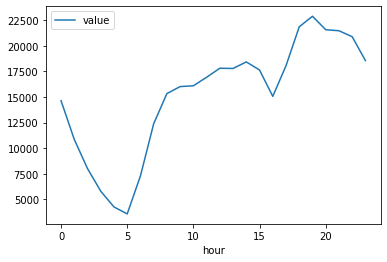

In [24]:
df[['value', 'hour']].groupby('hour').mean().plot()

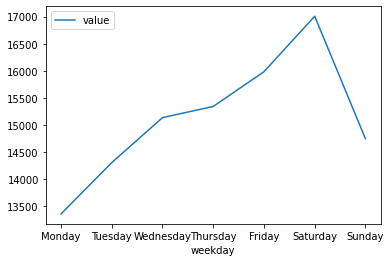

In [25]:
df[['value', 'weekday']].groupby('weekday').mean().plot()

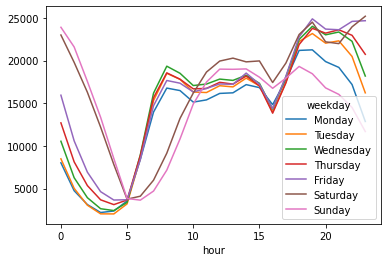

In [26]:


df.groupby(['hour', 'weekday']).mean()['value'].unstack().plot()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [27]:
df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour', 'weekday'], rsuffix='_avg')


,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


In [28]:
df_final = df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour', 'weekday'], rsuffix='_avg')

In [29]:
df_final.set_index('timestamp').loc['2015-01-26':'2015-01-27']

,value,hour,weekday,value_avg
timestamp,,,,
2015-01-26 00:00:00,5907.0,0,Monday,8020.283333
2015-01-26 01:00:00,3649.5,1,Monday,4749.750000
2015-01-26 02:00:00,2310.0,2,Monday,3125.800000
2015-01-26 03:00:00,1949.5,3,Monday,2195.133333
2015-01-26 04:00:00,2165.5,4,Monday,2373.166667
2015-01-26 05:00:00,3723.0,5,Monday,3550.800000
2015-01-26 06:00:00,9146.0,6,Monday,8414.566667
2015-01-26 07:00:00,15835.5,7,Monday,13968.766667
2015-01-26 08:00:00,18804.5,8,Monday,16774.483333


In [31]:
df_final.set_index('timestamp').loc['2014-11-02']

,value,hour,weekday,value_avg
timestamp,,,,
2014-11-02 00:00:00,24109.5,0,Sunday,23898.733333
2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333
2014-11-02 02:00:00,12754.5,2,Sunday,17555.266667
2014-11-02 03:00:00,8955.5,3,Sunday,13350.550000
2014-11-02 04:00:00,5453.5,4,Sunday,8506.500000
2014-11-02 05:00:00,5174.0,5,Sunday,3837.450000
2014-11-02 06:00:00,4920.0,6,Sunday,3643.983333
2014-11-02 07:00:00,5592.0,7,Sunday,4711.300000
2014-11-02 08:00:00,7525.5,8,Sunday,7159.516667


In [36]:
df_final["day"] = df.timestamp.dt.weekday

In [37]:
df_final.head()

,timestamp,value,hour,weekday,value_avg,day
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1


In [38]:
data = df_final[['value', 'hour', 'day']]

In [42]:
print(df_final.columns)
print(data.columns)

Index(['timestamp', 'value', 'hour', 'weekday', 'value_avg', 'day'], dtype='object')
Index(['value', 'hour', 'day'], dtype='object')


In [43]:
model = IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200)
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [46]:
df_final["outliers"] = pd.Series(model.predict(data)).apply(lambda x: "yes" if(x == -1) else 'no')

In [48]:
df_final.query('outliers=="yes"')

,timestamp,value,hour,weekday,value_avg,day,outliers
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes
4419,2015-01-01 03:00:00,22067.0,3,Thursday,3683.177419,3,yes
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes


In [49]:
df_final.query('outliers=="no"')

,timestamp,value,hour,weekday,value_avg,day,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no
...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no


In [50]:
df_final.head()

,timestamp,value,hour,weekday,value_avg,day,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no


In [52]:
fig = px.scatter(df_final, x= "timestamp", y= 'value', color = "outliers", hover_data =['weekday', 'hour', 'value_avg'], title="NYC Taxi Demand")
fig.update_xaxes(
    rangeslider_visible= True,
)
fig.show()

**Identify Threshold to detect Outliers**

In [54]:
score = model.decision_function(data)
score

array([0.11208356, 0.15069777, 0.16811779, ..., 0.15370292, 0.12223797,
       0.10533944])

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   6.,   2.,   4.,   0.,   6.,   5.,   6.,
          8.,  10.,  15.,  19.,  15.,  31.,  44.,  43.,  82.,  84.,  79.,
        102., 128., 171., 230., 282., 337., 314., 427., 499., 490., 428.,
        425., 299., 225., 175., 128.,  35.]),
 array([-0.14560366, -0.13845347, -0.13130329, -0.1241531 , -0.11700292,
        -0.10985273, -0.10270255, -0.09555237, -0.08840218, -0.081252  ,
        -0.07410181, -0.06695163, -0.05980144, -0.05265126, -0.04550108,
        -0.03835089, -0.03120071, -0.02405052, -0.01690034, -0.00975015,
        -0.00259997,  0.00455021,  0.0117004 ,  0.01885058,  0.02600077,
         0.03315095,  0.04030114,  0.04745132,  0.0546015 ,  0.06175169,
         0.06890187,  0.07605206,  0.08320224,  0.09035243,  0.09750261,
         0.10465279,  0.11180298,  0.11895316,  0.12610335,  0.13325353,
         0.14040372,  0.1475539 ,  0.15470409,  0.16185427,  0.16900445,
 

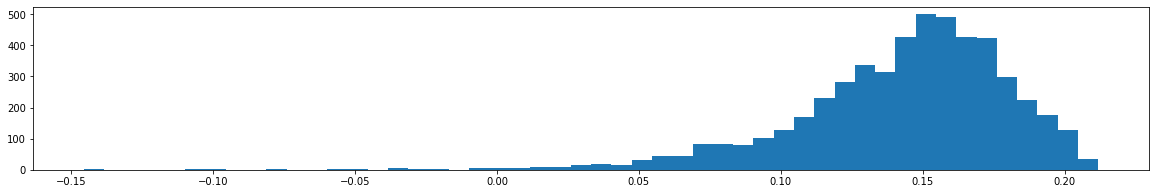

In [55]:
plt.hist(score, bins=50)

In [57]:
df_final["score"] = score
df_final.head()

,timestamp,value,hour,weekday,value_avg,day,outliers,score
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no,0.112084
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no,0.150698
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no,0.168118
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no,0.169955
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no,0.178681


In [58]:
df_final.query('score<0.02')

,timestamp,value,hour,weekday,value_avg,day,outliers,score
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes,-0.018296
1489,2014-09-01 01:00:00,10045.0,1,Monday,4749.750000,0,no,0.014030
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes,-0.034570
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes,-0.007447
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes,-0.145604
3671,2014-11-30 23:00:00,9437.0,23,Sunday,11686.450000,6,no,0.014709
4268,2014-12-25 20:00:00,10136.5,20,Thursday,23213.177419,3,no,0.015291
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes,-0.028297
4413,2014-12-31 21:00:00,27559.5,21,Wednesday,23345.806452,2,no,0.007348
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes,-0.034474
